<a href="https://colab.research.google.com/github/churamani2030dev/IBM_watson_studio_datascience/blob/main/IBM_watson_studio_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation System Project: IBM Community

In this notebook, you will be putting your recommendation skills to use on real data from the IBM Watson Studio platform.


You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/rubrics/3325/view).  **Please save regularly.**

By following the table of contents, you will build out a number of different methods for making recommendations that can be used for different situations.


## Table of Contents

I. [Exploratory Data Analysis](#Exploratory-Data-Analysis)<br>
II. [Rank Based Recommendations](#Rank)<br>
III. [User-User Based Collaborative Filtering](#User-User)<br>
IV. [Content Based Recommendations](#Content-Recs)<br>
V. [Matrix Factorization](#Matrix-Fact)<br>
VI. [Extras & Concluding](#conclusions)

At the end of the notebook, you will find directions for how to submit your work.  Let's get started by importing the necessary libraries and reading in the data.

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import project_tests as t


df = pd.read_csv(
    '/content/user-item-interactions.csv',
    dtype={'article_id': int, 'title': str, 'email': str}
)
# Show df to get an idea of the data
df.head()

,Unnamed: 0,article_id,title,email
0,0,1430,"using pixiedust for fast, flexible, and easier...",ef5f11f77ba020cd36e1105a00ab868bbdbf7fe7
1,1,1314,healthcare python streaming application demo,083cbdfa93c8444beaa4c5f5e0f5f9198e4f9e0b
2,2,1429,use deep learning for image classification,b96a4f2e92d8572034b1e9b28f9ac673765cd074
3,3,1338,ml optimization using cognitive assistant,06485706b34a5c9bf2a0ecdac41daf7e7654ceb7
4,4,1276,deploy your python model as a restful api,f01220c46fc92c6e6b161b1849de11faacd7ccb2


### <a class="anchor" id="Exploratory-Data-Analysis">Part I : Exploratory Data Analysis</a>

Use the dictionary and cells below to provide some insight into the descriptive statistics of the data.

`1.` Are there any missing values? If so, provide a count of missing values. If there are missing values in `email`, assign it the same id value `"unknown_user"`.

In [140]:
# Some interactions do not have a user associated with it, assume the same user.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45993 entries, 0 to 45992
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45993 non-null  int64 
 1   article_id  45993 non-null  int64 
 2   title       45993 non-null  object
 3   email       45976 non-null  object
dtypes: int64(2), object(2)
memory usage: 1.4+ MB


In [141]:
print(f"Number of Null email values is: ")

Number of Null email values is: 


In [142]:
df[df.email.isna()]

,Unnamed: 0,article_id,title,email
25131,25146,1016,why you should master r (even if it might even...,NaN
29758,30157,1393,the nurse assignment problem,NaN
29759,30158,20,working interactively with rstudio and noteboo...,NaN
29760,30159,1174,breast cancer wisconsin (diagnostic) data set,NaN
29761,30160,62,data visualization: the importance of excludin...,NaN
35264,36016,224,"using apply, sapply, lapply in r",NaN
35276,36029,961,beyond parallelize and collect,NaN
35277,36030,268,sector correlations shiny app,NaN
35278,36031,268,sector correlations shiny app,NaN
35279,36032,268,sector correlations shiny app,NaN


In [143]:
# Fill email NaNs with "unknown_user"


In [144]:
# Check if no more NaNs
df[df.email.isna()]

,Unnamed: 0,article_id,title,email
25131,25146,1016,why you should master r (even if it might even...,NaN
29758,30157,1393,the nurse assignment problem,NaN
29759,30158,20,working interactively with rstudio and noteboo...,NaN
29760,30159,1174,breast cancer wisconsin (diagnostic) data set,NaN
29761,30160,62,data visualization: the importance of excludin...,NaN
35264,36016,224,"using apply, sapply, lapply in r",NaN
35276,36029,961,beyond parallelize and collect,NaN
35277,36030,268,sector correlations shiny app,NaN
35278,36031,268,sector correlations shiny app,NaN
35279,36032,268,sector correlations shiny app,NaN


`2.` What is the distribution of how many articles a user interacts with in the dataset?  Provide a visual and descriptive statistics to assist with giving a look at the number of times each user interacts with an article.

In [145]:
# What are the descriptive statistics of the number of articles a user interacts with?


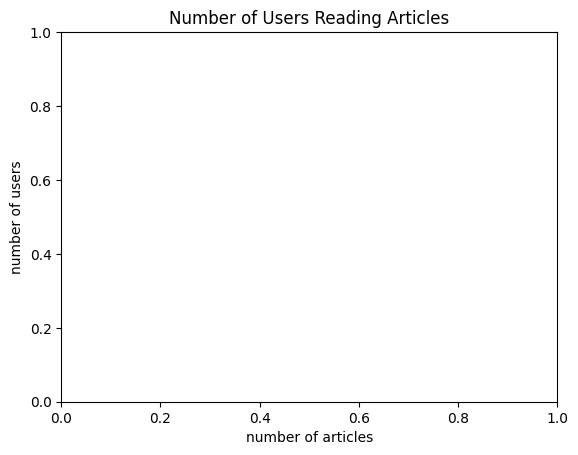

In [146]:
# Create a plot of the number of articles read by each user

plt.xlabel('number of articles')
plt.ylabel('number of users')
plt.title('Number of Users Reading Articles')
plt.show()

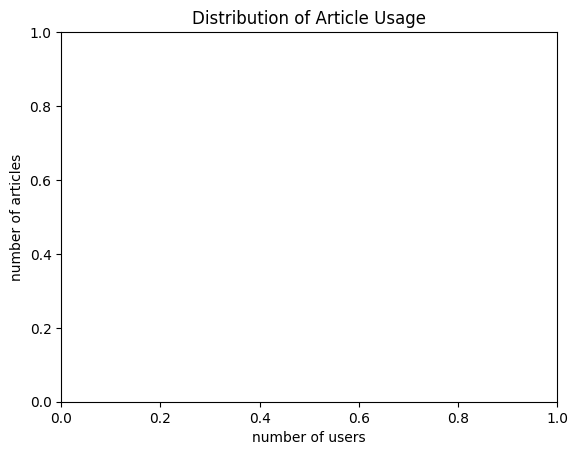

In [147]:
# Create a plot of the number of times each article was read

plt.xlabel('number of users')
plt.ylabel('number of articles')
plt.title('Distribution of Article Usage')
plt.show()

`3.` Use the cells below to find:

**a.** The number of unique articles that have an interaction with a user.  
**b.** The number of unique articles in the dataset (whether they have any interactions or not).<br>
**c.** The number of unique users in the dataset. (excluding null values) <br>
**d.** The number of user-article interactions in the dataset.

`4.` Use the cells below to find the most viewed **article_id**, as well as how often it was viewed.  After talking to the company leaders, the `email_mapper` function was deemed a reasonable way to map users to ids.  There were a small number of null values, and it was found that all of these null values likely belonged to a single user (which is how they are stored using the function below).

In [151]:
vc = df['article_id'].value_counts()
most_viewed_article_id = str(int(vc.index[0]))  # The most viewed article in the dataset as a string with one value following the decimal
max_views = int(vc.iloc[0])  # The most viewed article in the dataset was viewed how many times?


In [152]:
## No need to change the code here - this will be helpful for later parts of the notebook
# Run this cell to map the user email to a user_id column and remove the email column

def email_mapper(df=df):
    coded_dict = {
        email: num
        for num, email in enumerate(df['email'].unique(), start=1)
    }
    return [coded_dict[val] for val in df['email']]

df['user_id'] = email_mapper(df)
del df['email']

# show header
df.head()

,Unnamed: 0,article_id,title,user_id
0,0,1430,"using pixiedust for fast, flexible, and easier...",1
1,1,1314,healthcare python streaming application demo,2
2,2,1429,use deep learning for image classification,3
3,3,1338,ml optimization using cognitive assistant,4
4,4,1276,deploy your python model as a restful api,5


In [153]:
## If you stored all your results in the variable names above,
## you shouldn't need to change anything in this cell

sol_1_dict = {
    '`50% of individuals have _____ or fewer interactions.`': median_val,
    '`The total number of user-article interactions in the dataset is ______.`': user_article_interactions,
    '`The maximum number of user-article interactions by any 1 user is ______.`': max_views_by_user,
    '`The most viewed article in the dataset was viewed _____ times.`': max_views,
    '`The article_id of the most viewed article is ______.`': unique_articles,
    '`The number of unique users in the dataset is ______`': unique_users,
    '`The number of unique articles on the IBM platform`': total_articles
}

# Test your dictionary against the solution
# t.sol_1_test(sol_1_dict)

### <a class="anchor" id="Rank">Part II: Rank-Based Recommendations</a>

In this project, we don't actually have ratings for whether a user liked an article or not.  We only know that a user has interacted with an article. In these cases, the popularity of an article can really only be based on how often an article was interacted with.

`1.` Fill in the function below to return the **n** top articles ordered with most interactions as the top. Test your function using the tests below.

In [154]:
def get_top_articles(n, df=df):
    """Return the top n article titles by total interactions."""
    n = int(n)
    top_articles = (df['title']
                    .value_counts()
                    .head(n)
                    .index
                    .tolist())
    return top_articles

def get_top_article_ids(n, df=df):
    """Return the top n article ids (as strings) by total interactions."""
    n = int(n)
    top_article_ids = (df['article_id']
                       .value_counts()
                       .head(n)
                       .index
                       .astype(int).astype(str)
                       .tolist())
    return top_article_ids


In [155]:
print(get_top_articles(10))
print(get_top_article_ids(10))

['use deep learning for image classification', 'insights from new york car accident reports', 'visualize car data with brunel', 'use xgboost, scikit-learn & ibm watson machine learning apis', 'predicting churn with the spss random tree algorithm', 'healthcare python streaming application demo', 'finding optimal locations of new store using decision optimization', 'apache spark lab, part 1: basic concepts', 'analyze energy consumption in buildings', 'gosales transactions for logistic regression model']
['1429', '1330', '1431', '1427', '1364', '1314', '1293', '1170', '1162', '1304']


In [156]:
# Test your function by returning the top 5, 10, and 20 articles
top_5 = get_top_articles(5)
top_10 = get_top_articles(10)
top_20 = get_top_articles(20)

# Test each of your three lists from above
# t.sol_2_test(get_top_articles)

### <a class="anchor" id="User-User">Part III: User-User Based Collaborative Filtering</a>


`1.` Use the function below to reformat the **df** dataframe to be shaped with users as the rows and articles as the columns.  

* Each **user** should only appear in each **row** once.


* Each **article** should only show up in one **column**.  


* **If a user has interacted with an article, then place a 1 where the user-row meets for that article-column**.  It does not matter how many times a user has interacted with the article, all entries where a user has interacted with an article should be a 1.  


* **If a user has not interacted with an item, then place a zero where the user-row meets for that article-column**.

Use the tests to make sure the basic structure of your matrix matches what is expected by the solution.

In [157]:
# create the user-article matrix with 1's and 0's

def create_user_item_matrix(df, fill_value=0):
    """Return a user-item matrix with users as rows and articles as columns; values in {0,1}."""
    user_item = (df.drop_duplicates(['user_id','article_id'])
                   .assign(val=1)
                   .pivot_table(index='user_id', columns='article_id', values='val', fill_value=0))
    user_item = user_item.sort_index(axis=0).sort_index(axis=1)
    return user_item

user_item = create_user_item_matrix(df)

In [158]:
## Tests: You should just need to run this cell.  Don't change the code.
assert user_item.shape[0] == 5149, "Oops!  The number of users in the user-article matrix doesn't look right."
assert user_item.shape[1] == 714, "Oops!  The number of articles in the user-article matrix doesn't look right."
assert user_item.sum(axis=1)[1] == 36, "Oops!  The number of articles seen by user 1 doesn't look right."
print("You have passed our quick tests!  Please proceed!")

You have passed our quick tests!  Please proceed!


`2.` Complete the function below which should take a user_id and provide an ordered list of the most similar users to that user (from most similar to least similar).  The returned result should not contain the provided user_id, as we know that each user is similar to him/herself. Because the results for each user here are binary, it (perhaps) makes sense to compute similarity as the dot product of two users.

Use the tests to test your function.

In [159]:
def find_similar_users(user_id, user_item=user_item, include_similarity=False):
    """Compute dot-product similarity between the given user and all users; return sorted neighbors."""
    # target vector
    target = user_item.loc[user_id].values
    # similarities (dot product)
    sims = user_item.values.dot(target)
    sim_series = pd.Series(sims, index=user_item.index)
    # drop self and sort
    sim_series = sim_series.drop(user_id).sort_values(ascending=False)
    most_similar_users = sim_series.index.astype(int).tolist()
    most_similar_vals = sim_series.values.tolist()
    if include_similarity:
        return [[int(uid), float(sim)] for uid, sim in zip(most_similar_users, most_similar_vals)]
    return most_similar_users

In [160]:
def find_similar_users(user_id, user_item=user_item, include_similarity=False):
    """Compute dot-product similarity between the given user and all users; return sorted neighbors."""
    # target vector
    target = user_item.loc[user_id].values
    # similarities (dot product)
    sims = user_item.values.dot(target)
    sim_series = pd.Series(sims, index=user_item.index)
    # drop self and sort
    sim_series = sim_series.drop(user_id).sort_values(ascending=False)
    most_similar_users = sim_series.index.astype(int).tolist()
    most_similar_vals = sim_series.values.tolist()
    if include_similarity:
        return [[int(uid), float(sim)] for uid, sim in zip(most_similar_users, most_similar_vals)]
    return most_similar_users


In [161]:
# Do a spot check of your function
print("The 10 most similar users to user 1 are: {}".format(find_similar_users(1)[:10]))
print("The 5 most similar users to user 3933 are: {}".format(find_similar_users(3933)[:5]))
print("The 3 most similar users to user 46 are: {}".format(find_similar_users(46)[:3]))

The 10 most similar users to user 1 are: [3933, 3782, 23, 4459, 203, 131, 3870, 46, 4201, 5041]
The 5 most similar users to user 3933 are: [1, 23, 3782, 203, 4459]
The 3 most similar users to user 46 are: [4201, 23, 3782]


`3.` Now that you have a function that provides the most similar users to each user, you will want to use these users to find articles you can recommend.  Complete the functions below to return the articles you would recommend to each user.

In [162]:
def get_article_names(article_ids, df=df):
    """Map a list of article_ids to their titles. Duplicates removed, order preserved."""
    id2title = df.drop_duplicates('article_id').set_index('article_id')['title'].to_dict()
    names, seen = [], set()
    for a in article_ids:
        try:
            aid = int(a)
        except Exception:
            try:
                aid = int(float(a))
            except Exception:
                continue
        if aid in seen:
            continue
        seen.add(aid)
        if aid in id2title:
            names.append(id2title[aid])
    return names

def get_ranked_article_unique_counts(article_ids, user_item=user_item):
    """Return article_ids sorted by descending unique user counts in user_item."""
    cols = [int(i) for i in article_ids if int(i) in user_item.columns]
    if not cols:
        return []
    counts = user_item[cols].sum(axis=0).sort_values(ascending=False)
    return counts.index.astype(str).tolist()

def get_user_articles(user_id, user_item=user_item):
    """Return (article_ids[str], article_names[list]) the user has interacted with."""
    if user_id not in user_item.index:
        return [], []
    article_ids = user_item.columns[user_item.loc[user_id] == 1].astype(str).tolist()
    return article_ids, get_article_names(article_ids, df=df)

def user_user_recs(user_id, m=10):
    """Neighbor-based CF: aggregate neighbors' unseen items; rank by popularity; return top-m."""
    if user_id not in user_item.index:
        recs = get_top_article_ids(m, df=df)
        return recs, get_article_names(recs, df=df)
    seen, _ = get_user_articles(user_id, user_item=user_item)
    neighbors = find_similar_users(user_id, user_item=user_item)
    candidates = []
    for nb in neighbors:
        nb_seen = user_item.columns[user_item.loc[int(nb)] == 1].astype(str).tolist()
        for aid in nb_seen:
            if aid not in seen and aid not in candidates:
                candidates.append(aid)
        if len(candidates) >= m*5:
            break
    ranked = get_ranked_article_unique_counts(candidates, user_item=user_item)
    recs = ranked[:m]
    return recs, get_article_names(recs, df=df)

In [163]:
# Check Results
get_article_names(user_user_recs(1, 10)) # Return 10 recommendations for user 1

[]

In [164]:
get_ranked_article_unique_counts([1320, 232, 844])

['1320', '844', '232']

`4.` Now we are going to improve the consistency of the **user_user_recs** function from above.  

* Instead of arbitrarily choosing when we obtain users who are all the same closeness to a given user - choose the users that have the most total article interactions before choosing those with fewer article interactions.


* Instead of arbitrarily choosing articles from the user where the number of recommended articles starts below m and ends exceeding m, choose articles with the articles with the most total interactions before choosing those with fewer total interactions. This ranking should be  what would be obtained from the **top_articles** function you wrote earlier.

In [166]:
def get_top_sorted_users(user_id, user_item=user_item):
    """Return a DataFrame of neighbors sorted by similarity then num_interactions (both desc)."""
    target = user_item.loc[user_id].values
    sims = user_item.values.dot(target)
    neighbors_df = pd.DataFrame({
        'neighbor_id': user_item.index,
        'similarity': sims,
        'num_interactions': user_item.sum(axis=1).values
    })
    neighbors_df = neighbors_df[neighbors_df['neighbor_id'] != user_id]
    neighbors_df = neighbors_df.sort_values(['similarity','num_interactions'], ascending=False).reset_index(drop=True)
    return neighbors_df

def user_user_recs_part2(user_id, m=10):
    """Improved CF: neighbor order by similarity then engagement; rank items by popularity."""
    if user_id not in user_item.index:
        recs = get_top_article_ids(m, df=df)
        return recs, get_article_names(recs, df=df)
    seen, _ = get_user_articles(user_id, user_item=user_item)
    neighbors_df = get_top_sorted_users(user_id, user_item=user_item)
    candidates = []
    for _, row in neighbors_df.iterrows():
        nb = int(row['neighbor_id'])
        nb_seen = user_item.columns[user_item.loc[nb] == 1].astype(str).tolist()
        for aid in nb_seen:
            if aid not in seen and aid not in candidates:
                candidates.append(aid)
        if len(candidates) >= m*5:
            break
    ranked = get_ranked_article_unique_counts(candidates, user_item=user_item)
    recs = ranked[:m]
    return recs, get_article_names(recs, df=df)

In [167]:
# Quick spot check - don't change this code - just use it to test your functions
rec_ids, rec_names = user_user_recs_part2(20, 10)
print("The top 10 recommendations for user 20 are the following article ids:")
print(rec_ids)
print()
print("The top 10 recommendations for user 20 are the following article names:")
print(rec_names)

The top 10 recommendations for user 20 are the following article ids:
['1330', '1429', '1314', '1271', '43', '1351', '1336', '1368', '151', '1338']

The top 10 recommendations for user 20 are the following article names:
['insights from new york car accident reports', 'use deep learning for image classification', 'healthcare python streaming application demo', 'customer demographics and sales', 'deep learning with tensorflow course by big data university', 'model bike sharing data with spss', 'learn basics about notebooks and apache spark', 'putting a human face on machine learning', 'jupyter notebook tutorial', 'ml optimization using cognitive assistant']


`5.` Use your functions from above to correctly fill in the solutions to the dictionary below.  Then test your dictionary against the solution.  Provide the code you need to answer each following the comments below.

In [168]:
print(get_top_sorted_users(1, user_item=user_item).head(n=1))
print(get_top_sorted_users(2, user_item=user_item).head(n=10))
print(get_top_sorted_users(131, user_item=user_item).head(n=10))

   neighbor_id  similarity  num_interactions
0         3933        35.0              35.0
   neighbor_id  similarity  num_interactions
0           49         5.0             101.0
1         3697         5.0             100.0
2           98         5.0              97.0
3         3764         5.0              97.0
4           23         4.0             135.0
5         3782         4.0             135.0
6         4785         4.0              62.0
7           21         4.0              61.0
8          290         4.0              58.0
9         2982         4.0              58.0
   neighbor_id  similarity  num_interactions
0         3870        74.0              75.0
1         3782        39.0             135.0
2           23        38.0             135.0
3          203        33.0              96.0
4         4459        33.0              96.0
5           49        29.0             101.0
6         3697        29.0             100.0
7           98        29.0              97.0
8         

In [171]:
### Tests with a dictionary of results
user1_most_sim = find_similar_users(1)[0] # Find the user that is most similar to user 1
user2_6th_sim = find_similar_users(2)[5] # Find the 6th most similar user to user 2
user131_10th_sim = find_similar_users(131)[9] # Find the 10th most similar user to user 131

sol_5_dict = {
    'The user that is most similar to user 1.': user1_most_sim,
    'The user that is the 6th most similar to user 2.': user2_6th_sim,
    'The user that is the 10th most similar to user 131.': user131_10th_sim,
}

# t.sol_5_test(sol_5_dict)

`6.` If we were given a new user, which of the above functions would you be able to use to make recommendations?  Explain.  Can you think of a better way we might make recommendations?  Use the cell below to explain a better method for new users.

Answer:

Top articles as no user history, only can use user-user history till they start having user-item iteractions

`7.` Using your existing functions, provide the top 10 recommended articles you would provide for the a new user below.  You can test your function against our thoughts to make sure we are all on the same page with how we might make a recommendation.

In [172]:
# What would your recommendations be for this new user 0?  As a new user, they have no observed articles.
# Provide a list of the top 10 article ids you would give to
new_user_recs = get_top_article_ids(10) # Your recommendations here

### <a class="anchor" id="Content-Recs">Part IV: Content Based Recommendations</a>

Another method we might use to make recommendations is to recommend similar articles that are possibly related. One way we can find article relationships is by clustering text about those articles.  Let's consider content to be the article **title**, as it is the only text we have available. One point to highlight, there isn't one way to create a content based recommendation, especially considering that text information can be processed in many ways.  

`1.` Use the function bodies below to create a content based recommender function `make_content_recs`. We'll use TF-IDF to create a matrix based off article titles, and use this matrix to create clusters of related articles. You can use this function to make recommendations of new articles.

In [174]:
df.head()

,Unnamed: 0,article_id,title,user_id
0,0,1430,"using pixiedust for fast, flexible, and easier...",1
1,1,1314,healthcare python streaming application demo,2
2,2,1429,use deep learning for image classification,3
3,3,1338,ml optimization using cognitive assistant,4
4,4,1276,deploy your python model as a restful api,5


In [175]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD

In [176]:
df_unique_articles = df[['article_id','title']].drop_duplicates().reset_index(drop=True)

In [177]:
# Create a vectorizer using TfidfVectorizer and fit it to the article titles
max_features = 200
max_df = 0.75
min_df = 5

vectorizer = TfidfVectorizer(
    max_df=max_df,
    min_df=min_df,
    stop_words="english",
    max_features=max_features,
)
print("Running TF-IDF")
X_tfidf = vectorizer.fit_transform(df_unique_articles['title'].fillna(''))  # Fit the vectorizer to the article titles

print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

lsa = make_pipeline(TruncatedSVD(n_components=50, random_state=42), Normalizer(copy=False))
X_lsa = lsa.fit_transform(X_tfidf) # Fit the LSA model to the vectorized article titles
explained_variance = lsa[0].explained_variance_ratio_.sum()

print(f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")


Running TF-IDF
n_samples: 714, n_features: 125
Explained variance of the SVD step: 76.0%


Text(0.5, 0, 'Number of clusters')

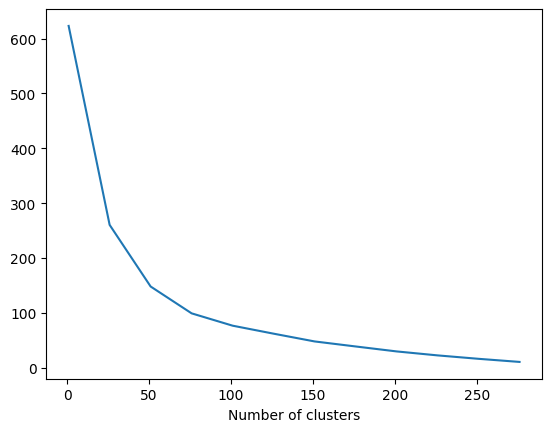

In [178]:
# Let's map the inertia for different number of clusters to find the optimal number of clusters
# We'll plot it to see the elbow
inertia = []
clusters = 300
step = 25
max_iter = 50
n_init = 5
random_state = 42
for k in range(1, clusters, step):
    kmeans = KMeans(
        n_clusters=k,
        max_iter=max_iter,
        n_init=n_init,
        random_state=random_state,
    ).fit(X_lsa)
    # inertia is the sum of squared distances to the closest cluster center
    inertia.append(kmeans.inertia_)
plt.plot(range(1, clusters, step), inertia)
plt.xlabel('Number of clusters')

There appears to be an elbow about 50, so we'll use 50 clusters.

In [179]:
n_clusters = 50  # Number of clusters (elbow around 50)
kmeans = KMeans(
    n_clusters=n_clusters,
    random_state=42,
    n_init=5,
    max_iter=50
).fit(X_lsa)


In [180]:
# create a new column `title_cluster` and assign it the kmeans cluster labels
# First we need to map the labels to df_unique_articles article ids and then apply those to df
article_cluster_map = dict(zip(df_unique_articles['article_id'].astype(int), kmeans.labels_))  # Map article_id to cluster label
df['title_cluster'] = df['article_id'].map(lambda x: article_cluster_map.get(int(x), -1))  # apply map to create title clusters

In [181]:
# Let's check the number of articles in each cluster
np.array(np.unique(kmeans.labels_, return_counts=True)).T

array([[ 0, 11],
       [ 1, 37],
       [ 2, 23],
       [ 3, 71],
       [ 4, 20],
       [ 5, 28],
       [ 6, 32],
       [ 7, 19],
       [ 8, 41],
       [ 9, 13],
       [10, 29],
       [11,  6],
       [12, 20],
       [13, 12],
       [14,  7],
       [15, 14],
       [16, 22],
       [17,  4],
       [18,  7],
       [19, 10],
       [20, 10],
       [21,  9],
       [22,  7],
       [23,  9],
       [24,  7],
       [25,  8],
       [26,  9],
       [27, 11],
       [28,  7],
       [29,  5],
       [30, 16],
       [31, 12],
       [32, 12],
       [33,  9],
       [34, 13],
       [35, 10],
       [36, 18],
       [37, 15],
       [38,  8],
       [39,  7],
       [40,  6],
       [41, 18],
       [42,  8],
       [43,  7],
       [44,  5],
       [45,  9],
       [46,  8],
       [47,  7],
       [48,  8],
       [49, 10]])

In [182]:
def get_similar_articles(article_id, df=df):
    """Return a list of article ids (strings) that are in the same title cluster as article_id."""
    id2cl = df.drop_duplicates('article_id').set_index('article_id')['title_cluster'].to_dict()
    try:
        aid = int(article_id)
    except Exception:
        aid = int(float(article_id))
    if aid not in id2cl:
        return []
    c = id2cl[aid]
    ids = df.loc[df['title_cluster']==c,'article_id'].drop_duplicates().astype(int).astype(str).tolist()
    return [i for i in ids if int(i) != aid]

In [183]:
def make_content_recs(article_id, n, df=df):
    """Return top-n similar-by-content article ids & names ranked by popularity."""
    sim_ids = get_similar_articles(article_id, df=df)
    ranked = get_ranked_article_unique_counts(sim_ids, user_item=user_item)
    n_ranked_similar_articles = ranked[:int(n)]
    n_ranked_article_names = get_article_names(n_ranked_similar_articles, df=df)
    return n_ranked_similar_articles, n_ranked_article_names

In [184]:
# Test out your content recommendations given artice_id 25
rec_article_ids, rec_article_titles = make_content_recs(25, 10)
print(rec_article_ids)
print(rec_article_titles)

['1025', '101', '975', '766', '508', '547', '132', '878', '92', '693']
['data tidying in data science experience', 'how to choose a project to practice data science', 'the data science process', 'making data science a team sport', 'data science in the cloud', 'trust in data science', 'collecting data science cheat sheets', '10 data science podcasts you need to be listening to right now', '9 mistakes to avoid when starting your career in data science', 'better together: spss and data science experience']


In [185]:
# Test out your content recommendations given artice_id 25
rec_article_ids, rec_article_titles = make_content_recs(25, 10)
print(rec_article_ids)
print(rec_article_titles)

# assert len({1025, 593, 349, 821, 464, 29, 1042, 693, 524, 352}.intersection(set(rec_article_ids))) > 0, "Oops! Your the make_content_recs function doesn't work quite how we expect."

['1025', '101', '975', '766', '508', '547', '132', '878', '92', '693']
['data tidying in data science experience', 'how to choose a project to practice data science', 'the data science process', 'making data science a team sport', 'data science in the cloud', 'trust in data science', 'collecting data science cheat sheets', '10 data science podcasts you need to be listening to right now', '9 mistakes to avoid when starting your career in data science', 'better together: spss and data science experience']


`2.` Now that you have put together your content-based recommendation system, use the cell below to write a summary explaining how your content based recommender works.  Do you see any possible improvements that could be made to your function? What other text data would be useful to help make better recommendations besides the article title?

**Write an explanation of your content based recommendation system here.**

### <a class="anchor" id="Matrix-Fact">Part V: Matrix Factorization</a>

In this part of the notebook, you will build use matrix factorization to make article recommendations to users.

`1.` You should have already created a **user_item** matrix above in **question 1** of **Part III** above.  This first question here will just require that you run the cells to get things set up for the rest of **Part V** of the notebook.

In [186]:
# quick look at the matrix
user_item.head()

article_id,0,2,4,8,9,12,14,15,16,18,...,1434,1435,1436,1437,1439,1440,1441,1442,1443,1444
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


`2.` In this situation, you can use Singular Value Decomposition from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html) on the user-item matrix.  Use the cell to perform SVD.

In [187]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import precision_score, recall_score, accuracy_score
# Using the full number of components which equals the number of columns
svd = TruncatedSVD(n_components=len(user_item.columns), n_iter=5, random_state=42)

u = svd.fit_transform(user_item)
v = svd.components_
s = svd.singular_values_
print('u', u.shape)
print('s', s.shape)
print('vt', v.shape)

u (5149, 714)
s (714,)
vt (714, 714)


`3.` Now for the tricky part, how do we choose the number of latent features to use?  Running the below cell, you can see that as the number of latent features increases, we obtain better metrics when making predictions for the 1 and 0 values in the user-item matrix.  Run the cell below to get an idea of how our metrics improve as we increase the number of latent features.

Text(0.5, 1.0, 'Metrics vs. Number of Latent Features')

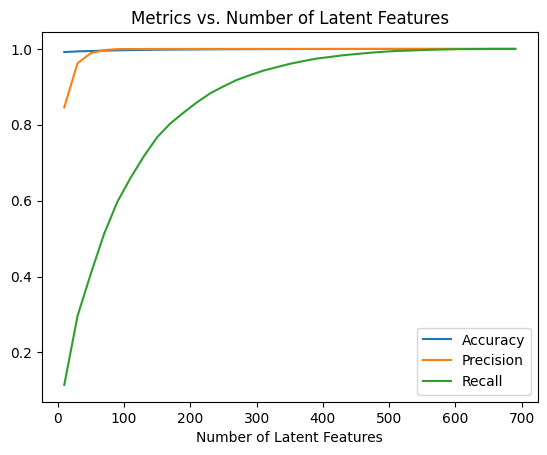

In [188]:
num_latent_feats = np.arange(10, 700+10, 20)
metric_scores = []

for k in num_latent_feats:
    # restructure with k latent features
    u_new, vt_new = u[:, :k], v[:k, :]

    # take dot product
    user_item_est = abs(np.around(np.dot(u_new, vt_new))).astype(int)
    # make sure the values are between 0 and 1
    user_item_est = np.clip(user_item_est, 0, 1)

    # total errors and keep track of them
    acc = accuracy_score(user_item.values.flatten(), user_item_est.flatten())
    precision = precision_score(user_item.values.flatten(), user_item_est.flatten())
    recall = recall_score(user_item.values.flatten(), user_item_est.flatten())
    metric_scores.append([acc, precision, recall])


plt.plot(num_latent_feats, metric_scores, label=['Accuracy', 'Precision', 'Recall'])
plt.legend()
plt.xlabel('Number of Latent Features')
plt.title('Metrics vs. Number of Latent Features')

`4.` From the above, we can't really be sure how many features to use, because simply having a better way to predict the 1's and 0's of the matrix doesn't exactly give us an indication of if we are able to make good recommendations. Given the plot above, what would you pick for the number of latent features and why?

**Provide your response here.**

`5.` Using 200 latent features and the values of U, S, and V transpose we calculated above, create an article id recommendation function that finds similar article ids to the one provide.

Create a list of 10 recommendations that are similar to article with id 4.  The function should provide these recommendations by finding articles that have the most similar latent features as the provided article.

In [189]:
def get_svd_similar_article_ids(article_id, vt, user_item=user_item, include_similarity=False):
    """Return article ids similar to `article_id` using cosine similarity in SVD latent space."""
    from sklearn.metrics.pairwise import cosine_similarity
    vt_T = np.array(vt).T  # (n_items, k)
    cols = list(user_item.columns.astype(int))
    try:
        aid = int(article_id)
    except Exception:
        aid = int(float(article_id))
    if aid not in cols:
        return [] if not include_similarity else []
    idx = cols.index(aid)
    sims = cosine_similarity(vt_T, vt_T[idx:idx+1]).ravel()
    ser = pd.Series(sims, index=[str(int(c)) for c in cols]).drop(str(int(aid))).sort_values(ascending=False)
    if include_similarity:
        return [[art_id, float(sim)] for art_id, sim in ser.items()]
    most_similar_items = ser.index.tolist()
    return most_similar_items

In [190]:
# Create a vt_new matrix with 200 latent features
k = 200
vt_new = v[:k, :]

In [191]:
# What is the article name for article_id 4?
print("Current article:", get_article_names([4], df=df)[0])

Current article: analyze ny restaurant data using spark in dsx


In [192]:
# What are the top 10 most similar articles to article_id 4?
rec_articles = get_svd_similar_article_ids(4, vt_new, user_item=user_item)[:10]
rec_articles

['1199', '1068', '486', '1202', '176', '1120', '244', '793', '58', '132']

In [193]:
# What are the top 10 most similar articles to article_id 4?
get_article_names(rec_articles, df=df)

['country statistics: crude oil - exports',
 'airbnb data for analytics: athens reviews',
 'use spark r to load and analyze data',
 'country statistics: crude oil - proved reserves',
 'top analytics tools in 2016',
 'airbnb data for analytics: paris calendar',
 'notebooks: a power tool for data scientists',
 '10 powerful features on watson data platform, no coding necessary',
 'advancements in the spark community',
 'collecting data science cheat sheets']

In [194]:
# assert set(rec_articles) == {1199, 1068, 486, 1202, 176, 1120, 244, 793, 58, 132}, "Oops! Your the get_svd_similar_article_ids function doesn't work quite how we expect."
print("That's right!  Great job!")

That's right!  Great job!


`6.` Use the cell below to comment on the results you found in the previous question. Given the circumstances of your results, discuss what you might do to determine if the recommendations you make above are an improvement to how users currently find articles, either by Sections 2, 3, or 4? Add any tradeoffs between each of the methods, and how you could leverage each type for different situations including new users with no history, recently new users with little history, and users with a lot of history.

**Your response here.**

<a id='conclusions'></a>
### Extras
Using your workbook, you could now save your recommendations for each user, develop a class to make new predictions and update your results, and make a flask app to deploy your results.  These tasks are beyond what is required for this project.  However, from what you learned in the lessons, you certainly capable of taking these tasks on to improve upon your work here!


## Conclusion

> Congratulations!  You have reached the end of the Recommendation Systems project!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2322/view). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [195]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Recommendations_with_IBM.ipynb'])

255

### Extras
Using your workbook, you could now save your recommendations for each user, develop a class to make new predictions and update your results, and make a flask app to deploy your results. These tasks are beyond what is required for this project. However, from what you learned in the lessons, you certainly capable of taking these tasks on to improve upon your work here!

## Conclusion

> Congratulations! You have reached the end of the Recommendation Systems project!

This project explored different recommendation systems for the IBM Watson Studio platform user-item interaction data.

**Key Findings:**

*   **Data Overview:** The dataset contains user interactions with articles, including `article_id`, `title`, and `email` (mapped to `user_id`). There were some missing email values which were appropriately handled by assigning them to an "unknown_user".
*   **User and Article Distribution:** The analysis revealed a skewed distribution of user interactions, with many users interacting with only a few articles and a few users being highly active. Similarly, a small number of articles received a large number of views, while most articles had fewer interactions.
*   **Recommendation Methods:**
    *   **Rank-Based Recommendations:** This simple method recommends the most popular articles based on the total number of interactions. It's a good baseline and useful for new users with no interaction history.
    *   **User-User Based Collaborative Filtering:** This method recommends articles that similar users have interacted with. Similarity is calculated using the dot product of user-item interaction vectors. An improved version sorts neighbors by similarity and then by the number of interactions, and ranks candidate articles by popularity among neighbors.
    *   **Content-Based Recommendations:** This method recommends articles with similar content based on the article titles. TF-IDF and KMeans clustering were used to identify similar articles. This method is useful for recommending items similar to those a user has already shown interest in, regardless of other users' behavior.
    *   **Matrix Factorization (SVD):** Singular Value Decomposition was applied to the user-item matrix to discover latent features that represent user preferences and article characteristics. This method can capture more complex relationships between users and items and can provide personalized recommendations.
*   **Method Tradeoffs and Applicability:**
    *   **New Users (Cold Start):** Rank-based recommendations are most suitable as there is no historical data for these users.
    *   **Recently New Users (Slight History):** User-user collaborative filtering can start to be applied, but recommendations might be limited due to sparse interaction data. Content-based recommendations can also be useful if the user has interacted with a few articles whose content can be analyzed.
    *   **Users with Extensive History:** User-user collaborative filtering and matrix factorization methods are most effective as there is sufficient data to find similar users or learn latent factors.
*   **Potential Improvements:** Incorporating more content features (like article body or tags) could enhance content-based recommendations. Experimenting with different matrix factorization techniques or incorporating time-based dynamics could also improve the recommendation quality. Evaluating the different recommendation methods with A/B testing would be crucial to determine their real-world effectiveness.

Overall, this project successfully implemented and explored various recommendation system approaches, highlighting their strengths and weaknesses in different scenarios.

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2322/view). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!